In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [76]:
data = pd.read_csv('../자료/전라남도_여수시_공영자전거일별대여건수_20180820.csv', engine = 'python')

In [77]:
data1 = pd.read_csv('../자료/전라남도_여수시_공영자전거일별대여시간_20180820.csv', engine = 'python')

In [78]:
df = pd.merge(data, data1, on = '대여일', how = 'inner')

In [79]:
df.head()

,대여일,총대여시간,전체대여건
0,2018-08-17,66시간 8분,149
1,2018-08-16,220시간 40분,454
2,2018-08-15,190시간 46분,320
3,2018-08-14,228시간 28분,400
4,2018-08-13,198시간 30분,350


In [80]:
df['대여일'] = pd.to_datetime(df['대여일'])

In [81]:
df['요일'] = df['대여일'].dt.weekday_name

In [82]:
df.head()

,대여일,총대여시간,전체대여건,요일
0,2018-08-17,66시간 8분,149,Friday
1,2018-08-16,220시간 40분,454,Thursday
2,2018-08-15,190시간 46분,320,Wednesday
3,2018-08-14,228시간 28분,400,Tuesday
4,2018-08-13,198시간 30분,350,Monday


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 0 to 957
Data columns (total 4 columns):
대여일      958 non-null datetime64[ns]
총대여시간    958 non-null object
전체대여건    958 non-null object
요일       958 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 37.4+ KB


In [84]:
tlist = []
for idx in df.index :
    str = df.loc[idx, '총대여시간']
    str = str.replace('시간', '')
    str = str.replace('분', '')
    str2 = str.split(' ')
    t = round((int(str2[0]) * 60 + int(str2[1]))/60,1)
    tlist.append(t)

ps = pd.Series(tlist)
ps

df['총시간'] = ps

In [85]:
df.head()

,대여일,총대여시간,전체대여건,요일,총시간
0,2018-08-17,66시간 8분,149,Friday,66.1
1,2018-08-16,220시간 40분,454,Thursday,220.7
2,2018-08-15,190시간 46분,320,Wednesday,190.8
3,2018-08-14,228시간 28분,400,Tuesday,228.5
4,2018-08-13,198시간 30분,350,Monday,198.5


In [92]:
tlist = []
for idx in df.index :
    str = df.loc[idx, '전체대여건']
    str = str.replace(',','')
    tlist.append(str)
    
psd = pd.Series(tlist)
psd

df['총대여'] = psd

In [111]:
df.head()

,대여일,총대여시간,전체대여건,요일,총시간,총대여
0,2018-08-17,66시간 8분,149,Friday,66.1,149
1,2018-08-16,220시간 40분,454,Thursday,220.7,454
2,2018-08-15,190시간 46분,320,Wednesday,190.8,320
3,2018-08-14,228시간 28분,400,Tuesday,228.5,400
4,2018-08-13,198시간 30분,350,Monday,198.5,350


In [112]:
df['총대여'] = pd.to_numeric(df['총대여'])

In [113]:
df1 = df.groupby(['요일'])['총시간','총대여'].mean()
df1

,총시간,총대여
요일,,
Friday,118.523913,222.043478
Monday,112.179562,198.240876
Saturday,201.858394,362.613139
Sunday,174.012409,314.773723
Thursday,118.887591,209.036496
Tuesday,117.431618,211.985294
Wednesday,118.488235,204.235294


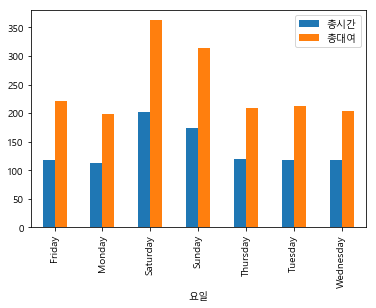

In [119]:
df1.plot(kind = 'bar')
